In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, Birch

In [5]:
data = pd.read_csv('openML_banknote_authentication_dataset.csv')
data.head()

,id,V1,V2,V3,V4,Class
0,1,3.62160,8.6661,-2.8073,-0.44699,1
1,2,4.54590,8.1674,-2.4586,-1.46210,1
2,3,3.86600,-2.6383,1.9242,0.10645,1
3,4,3.45660,9.5228,-4.0112,-3.59440,1
4,5,0.32924,-4.4552,4.5718,-0.98880,1


In [6]:
# normalise the data
normed_data = (data - data.min())/(data.max() - data.min())

In [7]:
kmeans_res = KMeans(n_clusters=2)
cluster_groups = kmeans_res.fit_predict(normed_data[['V1', 'V2']])
normed_data['Clusters'] = cluster_groups
inaccurate = normed_data[ normed_data['Class'] != normed_data['Clusters'] ]
accuracy = (len(normed_data) - len(inaccurate))/(len(normed_data))*100
print(f'accuracy: {accuracy}')

accuracy: 87.24489795918367


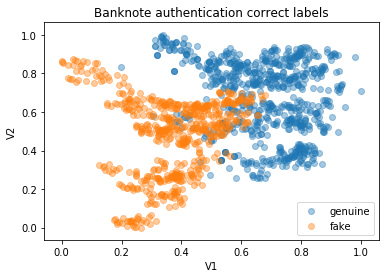

In [8]:
# actually correct classing
label_name = ['genuine', 'fake']

for index, label in enumerate(label_name):
    temp = normed_data[ normed_data['Class'] == index ]
    plt.scatter(temp['V1'], temp['V2'], label=label, alpha=0.4)
    
plt.legend()
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('Banknote authentication correct labels')
plt.show()

In [9]:
feature_col = normed_data[['V1','V2','V3','V4']].columns
x = np.array([1,2,3])
x = np.vstack((x, [1,2,3]))
x

array([[1, 2, 3],
       [1, 2, 3]])

In [10]:
# try birch clustering accuracy
birch = Birch(threshold=0.01, n_clusters=2)
birch.fit(normed_data[['V1', 'V2']])
birch_cluster = birch.predict(normed_data[['V1','V2']])

normed_data['Birch'] = birch_cluster
b_inaccurate = normed_data[ normed_data['Class'] != normed_data['Birch'] ]
b_accuracy = (len(normed_data) - len(b_inaccurate))/(len(normed_data))*100
print(f"Birch accuracy: {b_accuracy}")

Birch accuracy: 91.76384839650146


In [11]:
# try KNN
# create a dataframe with all training data except the target column
X = normed_data.drop(columns=['Class', 'Clusters', 'Birch'])
X.head()

,id,V1,V2,V3,V4
0,0.000000,0.769004,0.839643,0.106783,0.736628
1,0.000729,0.835659,0.820982,0.121804,0.644326
2,0.001459,0.786629,0.416648,0.310608,0.786951
3,0.002188,0.757105,0.871699,0.054921,0.450440
4,0.002918,0.531578,0.348662,0.424662,0.687362


In [13]:
# insert the training column into another variable
y = normed_data['Class'].values
y[0:5]

array([0., 0., 0., 0., 0.])

split the dataset into training and testing data
- the training data is the data the model will learn from
- the testing data will be used to see how well the model performs on unseen data

test_size=0.2
- this means that 20% of all data will be used for testing
- the rest 80% will be used for training data for the model to learn from

random_state=1
- ensure will get the same split each time so we can reproduce our results

stratify=y
- make sure the training split represent the proportion of each value in the y variable
- if in the datasest 25% genuine and 75% fake: 
    - stratify = y will insure that the random split has 25% genuine and 75% fake

In [14]:
from sklearn.model_selection import train_test_split
# split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                   random_state=1,
                                                   stratify=y)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
# create KNN classifier
'''
neighbors = 3: 
if 2/3 are fake, then new data point will be labeled as genuine.
the new data point is labeled with by majority from the 3 nearest points
'''
knn = KNeighborsClassifier(n_neighbors = 2)

#fit the classfier to the data
knn.fit(X_train, y_train)

#show first 5 model predictions on the test data
knn_res = knn.predict(X_test)

In [16]:
# check accuracy of the model on the test data
knn.score(X_test, y_test)

1.0

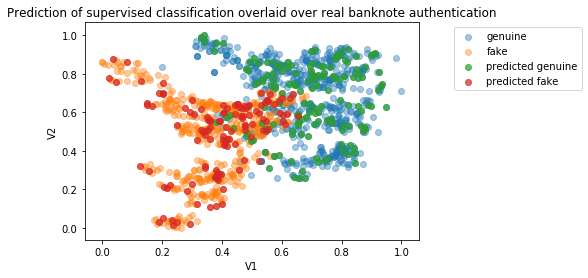

In [23]:
import random
label_name = ['genuine', 'fake']

for index, label in enumerate(label_name):
    temp = normed_data[ normed_data['Class'] == index ]
    plt.scatter(temp['V1'], temp['V2'], label=label, alpha=0.4)
    
Test_label = X_test.copy()
Test_label['KNN'] = knn.predict(X_test)
label_name_pred = ['predicted genuine', 'predicted fake']

for index, label in enumerate(label_name_pred):
    temp = Test_label[ Test_label['KNN'] == index ]
    plt.scatter(temp['V1'], temp['V2'], label=label, alpha=0.7)
    
plt.legend(bbox_to_anchor=(1.5,1.))
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('Prediction of supervised classification overlaid over real banknote authentication')


plt.show()

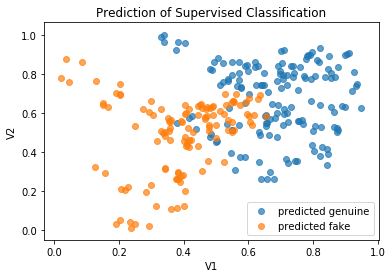

In [26]:
Test_label = X_test.copy()
Test_label['KNN'] = knn.predict(X_test)
label_name_pred = ['predicted genuine', 'predicted fake']

for index, label in enumerate(label_name_pred):
    temp = Test_label[ Test_label['KNN'] == index ]
    plt.scatter(temp['V1'], temp['V2'], label=label, alpha=0.7)
    
plt.legend()
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('Prediction of Supervised Classification')

plt.show()

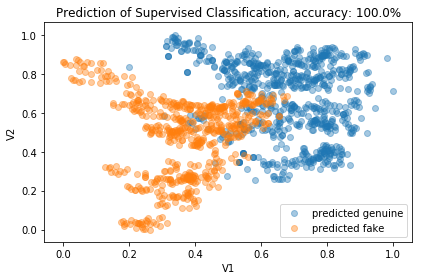

In [38]:
dropped_col = normed_data.drop(columns=['Class', 'Clusters', 'Birch'])
test = normed_data.copy()
test['KNN'] = knn.predict(dropped_col)

for index, label in enumerate(label_name_pred):
    temp = test[ test['KNN'] == index ]
    plt.scatter(temp['V1'], temp['V2'], label=label, alpha=0.4)

    
knn_accuracy = knn.score(X_test, y_test)*100
    
plt.legend()
plt.xlabel('V1')
plt.ylabel('V2')
plt.title(f'Prediction of Supervised Classification, accuracy: {knn_accuracy}%')
plt.savefig("knn classification")

plt.tight_layout()
plt.show()

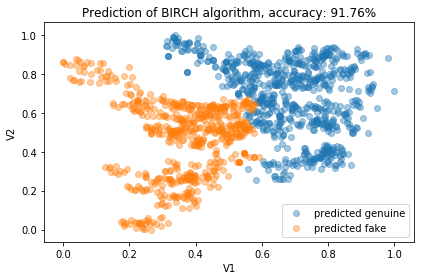

In [43]:
# plot birch
for index, label in enumerate(label_name_pred):
    temp = normed_data[ normed_data['Birch'] == index ]
    plt.scatter(temp['V1'], temp['V2'], label=label, alpha=0.4)

    
plt.legend()
plt.xlabel('V1')
plt.ylabel('V2')
plt.title(f'Prediction of BIRCH algorithm, accuracy: {round(b_accuracy,2)}%')

plt.tight_layout()
plt.show()

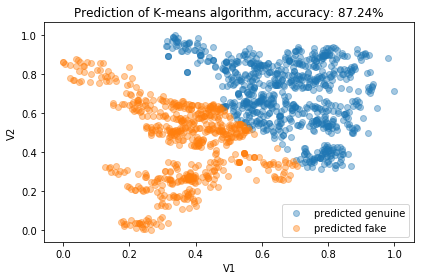

In [45]:
# plot Kmeans
for index, label in enumerate(label_name_pred):
    temp = normed_data[ normed_data['Clusters'] == index ]
    plt.scatter(temp['V1'], temp['V2'], label=label, alpha=0.4)
    
plt.legend()
plt.xlabel('V1')
plt.ylabel('V2')
plt.title(f'Prediction of K-means algorithm, accuracy: {round(accuracy,2)}%')

plt.tight_layout()
plt.show()

In [48]:
inaccurate_kmean = normed_data[ normed_data['Class'] != normed_data['Clusters'] ]


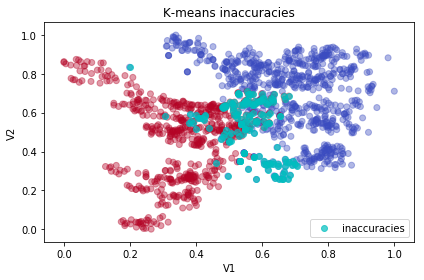

In [68]:
plt.scatter(normed_data['V1'], normed_data['V2'],
            alpha=0.4, c=normed_data['Class'], cmap="coolwarm",
           label=None)

plt.scatter(inaccurate_kmean['V1'], inaccurate_kmean['V2'],
            c='c', alpha=0.7, label="inaccuracies")
    
plt.legend(loc="lower right")
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('K-means inaccuracies')

plt.show()

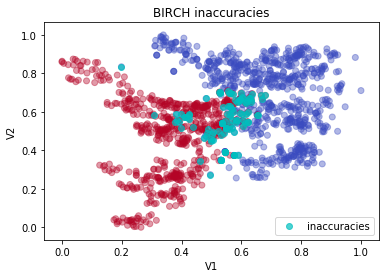

In [74]:
inaccurate_birch = normed_data[ normed_data['Class'] != normed_data['Birch'] ]
plt.scatter(normed_data['V1'], normed_data['V2'],
            alpha=0.4, c=normed_data['Class'], cmap="coolwarm",
           label=None)

plt.scatter(inaccurate_birch['V1'], inaccurate_birch['V2'],
            c='c', alpha=0.7, label="inaccuracies")
    
plt.legend(loc="lower right")
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('BIRCH inaccuracies')

plt.show()

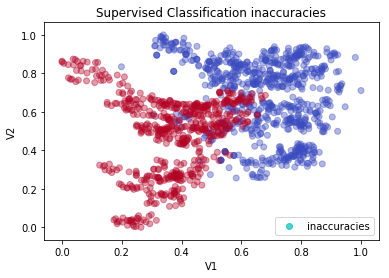

In [85]:
inaccurate_knn = test[ test['Class'] != test['KNN'] ]
plt.scatter(normed_data['V1'], normed_data['V2'],
            alpha=0.4, c=normed_data['Class'], cmap="coolwarm",
           label=None)

plt.scatter(inaccurate_knn['V1'], inaccurate_knn['V2'],
            c='c', alpha=0.7, label="inaccuracies")
    
plt.legend(loc="lower right")
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('Supervised Classification inaccuracies')

plt.show()